 # Pytorch Study

- follow [PyTorch for Deep Learning](https://www.youtube.com/watch?v=GIsg-ZUy0MY) Online class on Youtube

## Contents

- [PyTorch Basics: Tensors & Gradients](#Tensor-and-Gradient) 
- [Gradient Descent & Linear Regression](#Linear-Regression)
- [Working with Images & Logistic Regression](#Logistic-Regression-for-Image-classification)
- [Training Deep Neural Networks on a GPU](#Train-Deep-Neural-Network-on-GPU)
- [Image Classification using Convolutional Neural Networks](#Image-Classification-using-CNN)
- [Data Augmentation, Regularization and ResNets](#Image-Classification-using-ResNet)
- [Generating Images using Generative Adversarial Networks](#Generative-Adverserial-Networks-in-Pytorch)

In [1]:
import torch
import math

In [47]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

## Tensor and Gradient
back to [catalog](#Pytorch-Study)

In [2]:
t1 = torch.tensor([[[1.,2],[2,2]],[[1,2],[2,2]]])
t2 = torch.tensor([1,2])
print(t1)
print(t1.dtype)
print(t2)
print(t2.dtype)

tensor([[[1., 2.],
         [2., 2.]],

        [[1., 2.],
         [2., 2.]]])
torch.float32
tensor([1, 2])
torch.int64


In [3]:
t1 * t2

tensor([[[1., 4.],
         [2., 4.]],

        [[1., 4.],
         [2., 4.]]])

In [4]:
print('dim:',t1.dim())
print('shape:',t1.shape, t2.shape)
print('size:',t1.size(), t2.size())

dim: 3
shape: torch.Size([2, 2, 2]) torch.Size([2])
size: torch.Size([2, 2, 2]) torch.Size([2])


In [5]:
t1[0,1]

tensor([2., 2.])

In [6]:
t1[0][1]

tensor([2., 2.])

In [7]:
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad = True)
b = torch.tensor(5., requires_grad = True)

In [8]:
y = w*x + b
print(y)

tensor(17., grad_fn=<AddBackward0>)


In [9]:
## compute derivatives
y.backward()

In [10]:
# dy/dx is None because x don't have the requires_grad parameter
print('dy/dx', x.grad)
print('dy/dw', w.grad)
print('dy/db', b.grad)

dy/dx None
dy/dw tensor(3.)
dy/db tensor(1.)


### Interoperability with numpy

In [11]:
import numpy as np

x = np.array([[1,2],[3,4]])

In [12]:
# transfer a numpy array to pytorch tensor by torch.from_numpy() or torch.tensor()
y1 = torch.from_numpy(x)  ## don't copy the x, y is x ??
y2 = torch.tensor(x)      ## y is a copy of x

print(x.dtype, y1.dtype, y2.dtype)
y1 == y2

int32 torch.int32 torch.int32


tensor([[True, True],
        [True, True]])

### Tensor Functions

More Tensor Functions check on [here](https://pytorch.org/docs/stable/tensors.html)

In [13]:
t1

tensor([[[1., 2.],
         [2., 2.]],

        [[1., 2.],
         [2., 2.]]])

In [14]:
t3 = torch.full((3,2,2),40.)

In [15]:
t3

tensor([[[40., 40.],
         [40., 40.]],

        [[40., 40.],
         [40., 40.]],

        [[40., 40.],
         [40., 40.]]])

In [16]:
t4 = t3.reshape(2,6)

In [17]:
t4

tensor([[40., 40., 40., 40., 40., 40.],
        [40., 40., 40., 40., 40., 40.]])

## Linear Regression
back to [catalog](#Pytorch-Study)  <p>

train a linear regression problem with parameter: temperature, rainfall, humidity. predict apple yield and orange yield.
    
We want to have  functions:
- yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
- yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2

In [18]:
## train data
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

## target (apple, orange)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [19]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [20]:
# inital random model
# randn --> Gaussian distribution with miu=0, sigma=1
w = torch.randn(2,3, requires_grad = True)
b = torch.randn(2, requires_grad = True)
print(w)
print(b)

tensor([[-0.5696, -1.0438,  0.6834],
        [ 0.1839, -0.0029, -1.1214]], requires_grad=True)
tensor([0.4159, 0.1114], requires_grad=True)


In [21]:
def model(x):
    # @ is matrix multiplication in PyTorch
    return x @ w.t() + b

In [22]:
preds = model(inputs)
print(preds)
print(targets)

tensor([[ -81.7132,  -34.8778],
        [ -99.5342,  -55.1779],
        [-149.3697,  -49.3164],
        [ -77.2820,  -22.7476],
        [ -91.2524,  -65.9751]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


### Loss Function

In [23]:
# MSE
def mse(t1,t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [24]:
loss = mse(preds,targets)
print(loss)

tensor(27758.6445, grad_fn=<DivBackward0>)


### Compute Gradient

In [25]:
## Compute Gradient
loss.backward()

In [26]:
## Gradients for weights
print(w)
print(w.grad)

tensor([[-0.5696, -1.0438,  0.6834],
        [ 0.1839, -0.0029, -1.1214]], requires_grad=True)
tensor([[-14672.0049, -16798.5391, -10062.4805],
        [-11317.4658, -13105.5244,  -8047.6792]])


if gradient is **possitive**: 
- increasing the element's value will **increase** the loss
- decreasing the element's value will **decrease** the loss

So:
- If the gradient is possitive, degrease the parameter slightly
- If the gradient is negative, increase the parameter slightly

In [27]:
# w.grad.zero_()
# b.grad.zero_()
# print(w.grad)
# print(b.grad)

### Adjust weight

In [28]:
lr = 1e-5

with torch.no_grad():
    w -= w.grad * lr
    b -= b.grad * lr
    w.grad.zero_()
    b.grad.zero_()
    

In [29]:
for i in range(500):  # train 500 epochs
    preds = model(inputs)
    loss = mse(preds, targets)
    if i % 100 == 0:
        print(loss)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * lr
        b -= b.grad * lr
        w.grad.zero_()
        b.grad.zero_()

tensor(18986.8105, grad_fn=<DivBackward0>)
tensor(331.3088, grad_fn=<DivBackward0>)
tensor(162.9307, grad_fn=<DivBackward0>)
tensor(103.8266, grad_fn=<DivBackward0>)
tensor(77.4057, grad_fn=<DivBackward0>)


### Linear Regression using Pytorch Build-ins

In [30]:
import torch.nn as nn


In [31]:
# 
## train data
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70],
                  [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70],
                  [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70],]
                  , dtype='float32')

## target (apple, orange)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
                   [56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
                   [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]],
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [32]:
from torch.utils.data import TensorDataset, DataLoader

# define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[[1,3,10]]

(tensor([[ 91.,  88.,  64.],
         [102.,  43.,  37.],
         [ 73.,  67.,  43.]]),
 tensor([[ 81., 101.],
         [ 22.,  37.],
         [ 56.,  70.]]))

In [33]:
batch_size = 5
## build a calss by DataLoader that seperate dataset by batches that each batch has 5 
train_d1 = DataLoader(train_ds, batch_size, shuffle = True)

In [34]:
for xb, yb in train_d1:
    print(xb)
    print(yb)

tensor([[102.,  43.,  37.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 91.,  88.,  64.],
        [ 69.,  96.,  70.]])
tensor([[ 22.,  37.],
        [ 81., 101.],
        [ 22.,  37.],
        [ 81., 101.],
        [103., 119.]])
tensor([[ 87., 134.,  58.],
        [ 73.,  67.,  43.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [102.,  43.,  37.]])
tensor([[119., 133.],
        [ 56.,  70.],
        [103., 119.],
        [ 56.,  70.],
        [ 22.,  37.]])
tensor([[ 69.,  96.,  70.],
        [ 87., 134.,  58.],
        [ 91.,  88.,  64.],
        [ 73.,  67.,  43.],
        [ 87., 134.,  58.]])
tensor([[103., 119.],
        [119., 133.],
        [ 81., 101.],
        [ 56.,  70.],
        [119., 133.]])


#### build model (import linear regression in Pytorch)

In [35]:
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4886,  0.2489, -0.0156],
        [-0.4448,  0.1846,  0.2129]], requires_grad=True)
Parameter containing:
tensor([0.1147, 0.2227], requires_grad=True)


In [36]:
## show parameters
print('shpw parameters: ' ,list(model.parameters()))

## use model to predict
print('========================')
print('predict result:', model(inputs))

shpw parameters:  [Parameter containing:
tensor([[-0.4886,  0.2489, -0.0156],
        [-0.4448,  0.1846,  0.2129]], requires_grad=True), Parameter containing:
tensor([0.1147, 0.2227], requires_grad=True)]
predict result: tensor([[-19.5448, -10.7227],
        [-23.4395, -10.3804],
        [ -9.9420,  -1.3851],
        [-39.5934, -29.3321],
        [-10.7933,   2.1608],
        [-19.5448, -10.7227],
        [-23.4395, -10.3804],
        [ -9.9420,  -1.3851],
        [-39.5934, -29.3321],
        [-10.7933,   2.1608],
        [-19.5448, -10.7227],
        [-23.4395, -10.3804],
        [ -9.9420,  -1.3851],
        [-39.5934, -29.3321],
        [-10.7933,   2.1608]], grad_fn=<AddmmBackward>)


#### Loss Function

In [6]:
import torch.nn.functional as F

loss_fn = F.mse_loss

In [40]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(21783.5820, grad_fn=<MseLossBackward>)


#### Optimizer

In [41]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

#### Train the model

In [42]:
# Utility function to train the model

def fit(model,loss_fn, opt, num_epochs):
    
    for epoch in range(num_epochs):
        # catch data from formated batch dataset
        for xb,yb in train_d1:
            # predict
            pred = model(xb)
            # calculate loss
            loss = loss_fn(pred, yb)
            # compute gradients
            loss.backward()
            # update parameters
            opt.step()
            # reset gradients to zero
            opt.zero_grad()
        if (epoch + 1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss))
            

In [43]:
fit(model, loss_fn, opt, 200)

Epoch [10/200], Loss: 234.3708
Epoch [20/200], Loss: 171.0735
Epoch [30/200], Loss: 106.9168
Epoch [40/200], Loss: 100.1431
Epoch [50/200], Loss: 56.3757
Epoch [60/200], Loss: 42.8554
Epoch [70/200], Loss: 47.7791
Epoch [80/200], Loss: 48.2217
Epoch [90/200], Loss: 21.1566
Epoch [100/200], Loss: 29.8057
Epoch [110/200], Loss: 15.0130
Epoch [120/200], Loss: 22.5697
Epoch [130/200], Loss: 19.2665
Epoch [140/200], Loss: 7.1838
Epoch [150/200], Loss: 9.3810
Epoch [160/200], Loss: 12.3858
Epoch [170/200], Loss: 7.4297
Epoch [180/200], Loss: 8.4604
Epoch [190/200], Loss: 10.4172
Epoch [200/200], Loss: 7.2556


## Logistic Regression for Image classification

back to [catalog](#Pytorch-Study)

### Load Data

In [7]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import urllib

In [68]:
basepath = 'data/'
transform = transforms.ToTensor()

def set_header_for(url, filename):
    opener = urllib.request.URLopener()
    opener.addheader('User-Agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36')
    opener.retrieve(
    url, f'{basepath}/{filename}')

# set_header_for('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
# set_header_for('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
# set_header_for('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
# set_header_for('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

train_data = MNIST(root='data/', train=True,
                                   download=True, transform=transform)
test_data = MNIST(root='data/', train=False,
                                  download=True, transform=transform)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
image, label = train_data[6]
plt.imshow(image.reshape(28,28),cmap='gray')
print('label:', label)

In [ ]:
## split training data into training and validation set
def split_indices(n, val_pct):
    n_val = int(n*val_pct)
    idxs = np.random.permutation(n)
    return idxs[n_val:],idxs[:n_val]

In [139]:
train_indices, val_indices = split_indices(len(train_data),0.2)

In [141]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
## use batch data for training

In [144]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(train_data, batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(train_data, batch_size, sampler=val_sampler)

### Modeling

- a logistic regression model  `pred = x @ w.t() + b`
- use `nn.Linear` to create the model
- input size = 784(28 * 28) , output size = 10 (0-9)

In [452]:
input_size = 28*28
output_size = 10

class MnistModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, num_classes)
        self.softmax = nn.Softmax(dim=1)
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        xb = self.fc1(xb)
        xb = self.fc2(xb)
        xb = self.softmax(xb)
        return xb
    
model = MnistModel(input_size, output_size)

In [336]:
print('model weights: ',model.fc1.weight, '\nmodel bias:',model.fc2.bias)

model weights:  Parameter containing:
tensor([[-0.0067, -0.0071,  0.0353,  ..., -0.0185, -0.0205, -0.0017],
        [-0.0130,  0.0003, -0.0176,  ..., -0.0249, -0.0351,  0.0050],
        [ 0.0263,  0.0014, -0.0214,  ...,  0.0178, -0.0005, -0.0302],
        ...,
        [-0.0256, -0.0006,  0.0230,  ...,  0.0043, -0.0113, -0.0213],
        [-0.0148, -0.0075,  0.0334,  ..., -0.0234,  0.0016,  0.0289],
        [ 0.0214,  0.0340, -0.0310,  ...,  0.0168, -0.0344,  0.0085]],
       requires_grad=True) 
model bias: Parameter containing:
tensor([ 0.1677, -0.1375,  0.1603, -0.1045, -0.0124, -0.2783, -0.2553,  0.1579,
        -0.0163,  0.0021], requires_grad=True)


In [377]:
for images, labels in val_loader:
    probs = model(images)
    print(probs[0])
    break


tensor([4.8516e-06, 4.8177e-06, 1.0882e-07, 1.3709e-03, 7.5075e-02, 1.9630e-04,
        1.9175e-06, 8.5290e-03, 6.0990e-04, 9.1421e-01],
       grad_fn=<SelectBackward>)


### Evaluation Metrix and Loss Function

In [ ]:
import torch.nn.functioal as F

In [341]:
## evaluate function
def accuracy(output, label):
    _, preds = torch.max(output, dim=1)
    return torch.sum(preds==labels).item() / len(preds)

In [343]:
accuracy(probs,labels)

0.07

In [232]:
## lost function corss entropy
loss_fn = F.cross_entropy

In [432]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    preds = model(xb)
    loss = loss_func(preds, yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb)
    
    return loss.item(),len(xb), metric_result

def evaluate(input_model, loss_func, valid_dl, metric=None):
    with torch.no_grad():
        losses = []
        nums = []
        metrics = []
        for images,labels in val_loader:
            probs = input_model(images)
#             print(accuracy(probs, labels),sum(labels))
            losses.append(loss_func(probs, labels))
            metrics.append(accuracy(probs, labels))
            nums.append(len(labels))
        total = np.sum(nums)
        avg_loss = np.sum(np.multiply(losses, nums)) /total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums))/ total
        return avg_loss, total, avg_metric

In [433]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric = accuracy)
print('Loss: {:.2f}, Accuracy: {:.2f}'.format(val_loss, val_acc))

Loss: 1.62, Accuracy: 0.10


In [470]:
for images,labels in val_loader:
    probs = model(images)
    print(accuracy(probs,labels))

0.9
0.92
0.8
0.86
0.88
0.77
0.9
0.86
0.9
0.93
0.86
0.88
0.87
0.87
0.86
0.86
0.88
0.82
0.93
0.86
0.88
0.89
0.84
0.87
0.91
0.86
0.81
0.85
0.9
0.88
0.84
0.87
0.85
0.86
0.84
0.88
0.87
0.87
0.86
0.9
0.87
0.87
0.88
0.84
0.86
0.87
0.87
0.89
0.88
0.89
0.95
0.86
0.87
0.89
0.82
0.86
0.88
0.9
0.86
0.82
0.84
0.89
0.92
0.91
0.88
0.96
0.87
0.9
0.94
0.85
0.83
0.86
0.88
0.87
0.89
0.86
0.85
0.9
0.88
0.86
0.86
0.85
0.92
0.96
0.9
0.85
0.88
0.94
0.86
0.94
0.84
0.93
0.89
0.9
0.9
0.86
0.89
0.84
0.88
0.86
0.8
0.85
0.84
0.87
0.89
0.86
0.92
0.85
0.87
0.88
0.9
0.88
0.89
0.9
0.87
0.87
0.81
0.86
0.91
0.92


### Optimizer

In [234]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train the model

In [500]:
def fit(epoches, model, loss_fn, opt, train_dl, val_dl, metric=None):
    for epoch in range(epoches):
        for xb, yb in train_dl:
            loss,_,train_acc = loss_batch(model, loss_fn, xb, yb, opt)
#             print('loss in this batch: ',loss,'accuracy in this batch:', train_acc)
            
        result = evaluate(model, loss_fn, val_dl, metric)
        val_loss, total, val_metric = result
        
        if metric is None:
            print('Epoch [{}/{}], Loss:{:.4f}'.format(epoch+1, epoches, val_loss))
        else:
            print('Epoch [{}/{}], Loss:{:.4f},{}:{:.4f}'.format(
                epoch+1, epoches, val_loss, metric.__name__, val_metric))
#             for images,labels in val_dl:
#                 probs = model(images)
#                 print(accuracy(probs,labels))

In [501]:
model = MnistModel(input_size, output_size)

In [502]:
learning_rate = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.8)
loss_fn = F.cross_entropy
fit(epoches=10, model=model, loss_fn=loss_fn, opt=optimizer, train_dl=train_loader, val_dl=val_loader, metric=accuracy)

Epoch [1/10], Loss:2.2233,accuracy:0.0854
Epoch [2/10], Loss:1.9890,accuracy:0.0937
Epoch [3/10], Loss:1.8271,accuracy:0.0949
Epoch [4/10], Loss:1.7255,accuracy:0.1015
Epoch [5/10], Loss:1.6754,accuracy:0.0973
Epoch [6/10], Loss:1.6470,accuracy:0.0992
Epoch [7/10], Loss:1.6290,accuracy:0.1001
Epoch [8/10], Loss:1.6166,accuracy:0.0991
Epoch [9/10], Loss:1.6076,accuracy:0.0968
Epoch [10/10], Loss:1.6008,accuracy:0.1057


### Predict

In [476]:
def predict(model, img):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

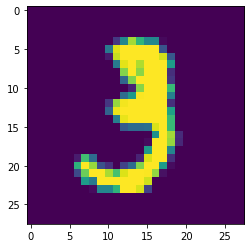

True label:3, predict label:3


In [503]:
index = 10
img, label = train_loader.dataset[index]
pred = predict(model, img)
plt.imshow(img.reshape(28,28))
plt.show()
print('True label:{}, predict label:{}'.format(label, pred))

### Save and load model

In [489]:
## save model parameters
torch.save(model.state_dict(),'mnist-logistic.pth')

In [498]:
## load saved parameters to new model
model2 = MnistModel(input_size, output_size)
model2.load_state_dict(torch.load('mnist-logistic.pth'))

<All keys matched successfully>

In [499]:
evaluate(model2, loss_fn, val_loader)

(1.6375270426273345, 12000, None)

## Train Deep Neural Network on GPU

back to [catalog](#Pytorch-Study)

also use the MNIST dataset in previous part (image classification by logistic regression)

### Load Data

In [8]:
from torch.utils.data import random_split
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

In [52]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

In [53]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

batch_size=128

train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [54]:
val_loader.batch_size

256

images.shape: torch.Size([128, 1, 28, 28])


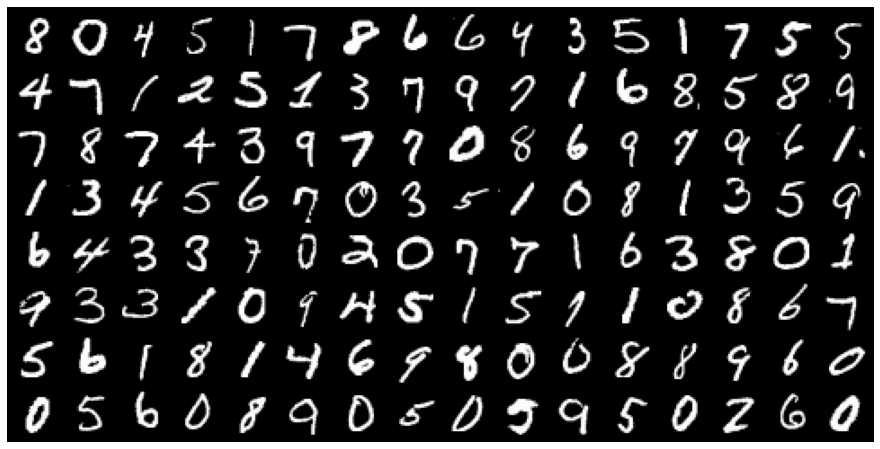

In [55]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

### Modeling

In [56]:
import torch.nn.functional as F
import torch.nn as nn


In [88]:
input_size = 28*28
hidden_size = 32
output_size = 10

class MnistDLModel(nn.Module):
    def __init__(self, input_size, hidden_size,output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, xb):
        xb = xb.view(xb.size(0),-1)
        out = self.fc1(xb)
        out = F.relu(out)
        out = self.fc2(out)
        return out
    
    def train_step(self, batch):
        imgs, labels = batch
        out = self(imgs)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self,batch):
        imgs, labels = batch
        out = self(imgs)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss':loss, 'val_acc':acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['val_loss'], result['val_acc']))

In [58]:
def accuracy(output, labels):
    _,preds = torch.max(output, dim=1)
    return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [59]:
model = MnistDLModel(input_size, hidden_size, output_size)

### Using a GPU

In [60]:
torch.cuda.is_available()

True

In [61]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [62]:
device = get_default_device()
device

device(type='cuda')

In [69]:
def to_device(data, device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    else:
        return data.to(device, non_blocking=True)

In [70]:
to_device(torch.tensor([1,2,3,4]), device)

tensor([1, 2, 3, 4], device='cuda:0')

In [71]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    def __iter__(self):
        for b in self.dl:
            ## yield pose the execuation of function, second time run this function
            ## will continue after first time, to make each time iter the next object
            yield to_device(b, self.device)
    def __len__(self):
        return len(self.dl)

In [72]:
train_dl = DeviceDataLoader(train_loader, device)
valid_dl = DeviceDataLoader(val_loader, device)


In [73]:
for xb, yb in valid_dl:
    print('xb.device:', xb.device)
    print('yb:',yb)
    break

xb.device: cuda:0
yb: tensor([9, 8, 6, 9, 9, 9, 9, 0, 4, 5, 1, 6, 6, 1, 9, 0, 0, 0, 2, 8, 4, 1, 9, 8,
        3, 3, 0, 9, 8, 1, 0, 4, 8, 2, 5, 3, 3, 9, 1, 2, 4, 7, 6, 8, 9, 1, 9, 0,
        3, 8, 6, 4, 6, 5, 7, 9, 5, 6, 5, 3, 1, 1, 6, 6, 2, 4, 8, 7, 9, 7, 7, 6,
        1, 8, 0, 7, 6, 2, 7, 9, 6, 1, 9, 4, 6, 7, 6, 2, 6, 3, 8, 1, 3, 4, 4, 6,
        9, 1, 0, 6, 6, 5, 3, 6, 9, 7, 1, 5, 4, 9, 3, 1, 9, 3, 2, 0, 4, 5, 0, 1,
        6, 0, 4, 9, 0, 5, 5, 7, 8, 4, 6, 8, 2, 5, 0, 4, 0, 1, 6, 0, 9, 5, 3, 2,
        2, 7, 8, 0, 0, 2, 7, 5, 0, 7, 2, 9, 5, 1, 2, 3, 1, 8, 1, 7, 3, 1, 2, 3,
        8, 8, 9, 9, 3, 8, 5, 9, 0, 0, 3, 2, 3, 3, 5, 8, 7, 1, 2, 8, 8, 7, 2, 4,
        6, 1, 8, 4, 9, 7, 0, 3, 9, 8, 0, 3, 5, 4, 6, 4, 0, 4, 3, 6, 7, 9, 6, 1,
        4, 8, 1, 8, 0, 7, 2, 4, 3, 6, 0, 9, 7, 7, 2, 8, 4, 7, 9, 3, 3, 9, 9, 2,
        0, 1, 3, 0, 6, 7, 6, 3, 8, 4, 1, 0, 9, 4, 1, 9], device='cuda:0')


In [74]:
device

device(type='cuda')

In [76]:
xb.device

device(type='cuda', index=0)

### Training Model

In [89]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.train_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [90]:
# Model (on GPU)
model = MnistDLModel(input_size, hidden_size=hidden_size, output_size=output_size)
to_device(model, device)

MnistDLModel(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)

In [91]:
model.cpu

<bound method Module.cpu of MnistDLModel(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)>

In [92]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 2.3013713359832764, 'val_acc': 0.04140625149011612}]

In [94]:
history += fit(5, 0.05, model, train_dl, valid_dl)

Epoch [0], val_loss: 0.1224, val_acc: 0.9631
Epoch [1], val_loss: 0.1223, val_acc: 0.9631
Epoch [2], val_loss: 0.1218, val_acc: 0.9639
Epoch [3], val_loss: 0.1198, val_acc: 0.9639
Epoch [4], val_loss: 0.1199, val_acc: 0.9646


## Image Classification using CNN


back to [catalog](#Pytorch-Study)

In [17]:
import os
import tarfile
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt
import numpy as np

In [3]:
## import dataset
dataset_url = 'https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz'
download_url(dataset_url,'data/')

Using downloaded and verified file: data/cifar10.tgz


In [4]:
# Extract from archive
with tarfile.open('./data/cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [13]:
data_dir = 'data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [14]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [15]:
def show_example(img,label):
    print('label:', dataset.classes[label], "("+str(label)+")")
    if img.shape[0] <=3:
        plt.imshow(img.permute(1, 2, 0))       
    else:
        plt.imshow(img)               

label: bird (2)


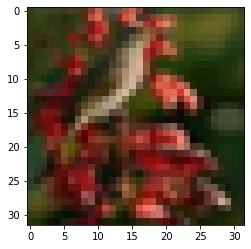

In [19]:

show_example(*dataset[12000])

###  Train and validation set

In [20]:
def split_indices(n, val_pct=0.2, seed=99):
    n_val = int(val_pct*n)
    np.random.seed(seed)
    idxs = np.random.permutation(n)
    return idxs[n_val:],idxs[:n_val]

In [24]:
val_pct = 0.2
rand_seed = 42
train_indices, val_indices = split_indices(len(dataset),val_pct, rand_seed)

In [25]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size = 128
train_dl = DataLoader(dataset, batch_size, sampler = SubsetRandomSampler(train_indices))
val_dl = DataLoader(dataset, batch_size, sampler = SubsetRandomSampler(val_indices))

In [26]:
from torchvision.utils import make_grid

def show_batch(dl):
    for imgs, labels in dl:
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(imgs,10).permute(1,2,0))
        break

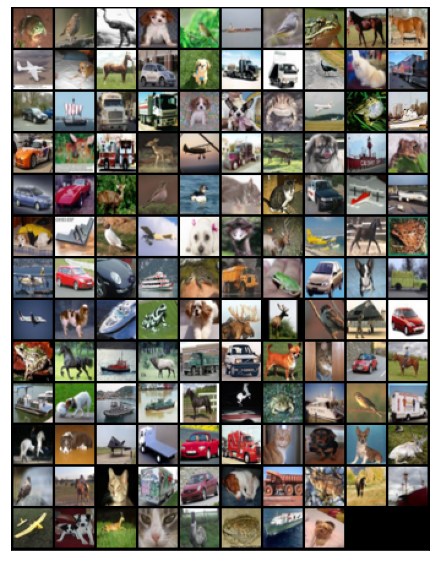

In [27]:
show_batch(train_dl)

### Modeling

In [42]:
def get_default_device():
    """Pick GPU if avaliable, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [40]:
device = get_default_device()
device

device(type='cuda')

In [44]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(val_dl, device)

In [75]:
## input batch of images of size n*3*32*32  (n is the batch_size)
model = nn.Sequential(nn.Conv2d(3,16, kernel_size=3, stride=1, padding=1), 
                      nn.ReLU(),
                      nn.MaxPool2d(2,2),  # output: n*16*16*16
                      
                      nn.Conv2d(16,16, kernel_size=3, stride=1, padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(2,2),  # output: n*16*8*8      
                      
                      nn.Conv2d(16,16, kernel_size=3, stride=1, padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(2,2),  # output: n*16*4*4    
                      
                      nn.Conv2d(16,16, kernel_size=3, stride=1, padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(2,2),  # output: n*16*2*2        
                      
                      nn.Flatten(),   # output: n*64
                      nn.Linear(64,10) # output: n*10
                             )
model.cuda()

In [77]:
for images, labels in valid_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape torch.Size([128, 10])


In [96]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    preds = model(xb)
    loss = loss_func(preds, yb)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb)
    return loss.item(),len(xb), metric_result

def evaluate(model, loss_func, valid_dl, metric=None):
    with torch.no_grad():
        results = [loss_batch(model, loss_func, xb, yb, metric=metric)
                  for xb, yb in valid_dl]
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        avg_loss = np.sum(np.multiply(losses,nums)) / total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

## evaluate function
def accuracy(output, label):
    _, preds = torch.max(output, dim=1)
    return torch.sum(preds==label).item() / len(preds)

In [85]:
preds = model(images)
print(preds.shape)

torch.Size([128, 10])


In [97]:
evaluate(model, nn.functional.cross_entropy, valid_dl, metric=accuracy)

(2.3024082248687745, 10000, 0.1142)

In [102]:
def fit(model, n_epoches, loss_func, train_dl, valid_dl, opt=None, lr=0.01, metric=None):
    train_losses, val_losses, val_metrics = [],[],[]
    if opt is None: opt = torch.optim.SGD
    opt = opt(model.parameters(),lr=lr)
    
    for epoch in range(n_epoches):
        # training
        model.train()
        for xb, yb in train_dl:
            train_loss,_,_ =loss_batch(model, loss_func, xb, yb, opt)
            
        # evaluate
        model.eval()
        result = evaluate(model, loss_func, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Record
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)
        
        if metric:
            print('Epoch [{}/{}],train_loss:{:.4f}, val_loss:{:.4f}, val_{}:{:.4f}'.format(
            epoch+1, n_epoches, train_loss, val_loss, metric.__name__, val_metric))
        else:
            print('Epoch [{}/{}],train_loss:{:.4f}, val_loss:{:.4f}'.format(
            epoch+1, n_epoches, train_loss, val_loss))            
    return [train_losses, val_losses, val_metrics]

In [111]:
num_epoches = 10
opt_fn = torch.optim.Adam
lr = 0.005
loss_function = nn.functional.cross_entropy
fit(model, num_epoches, loss_function, train_dl, valid_dl, opt=opt_fn, lr=lr, metric=accuracy)

Epoch [1/10],train_loss:1.0984, val_loss:1.2003, val_accuracy:0.5789
Epoch [2/10],train_loss:1.1494, val_loss:1.1867, val_accuracy:0.5810
Epoch [3/10],train_loss:1.0389, val_loss:1.1060, val_accuracy:0.6171
Epoch [4/10],train_loss:1.2494, val_loss:1.1724, val_accuracy:0.5904
Epoch [5/10],train_loss:1.0780, val_loss:1.0914, val_accuracy:0.6222
Epoch [6/10],train_loss:0.8738, val_loss:1.0972, val_accuracy:0.6259
Epoch [7/10],train_loss:0.8966, val_loss:1.0870, val_accuracy:0.6235
Epoch [8/10],train_loss:1.1324, val_loss:1.1008, val_accuracy:0.6139
Epoch [9/10],train_loss:1.1589, val_loss:1.0108, val_accuracy:0.6496
Epoch [10/10],train_loss:0.7972, val_loss:1.0489, val_accuracy:0.6342


In [52]:
 nn.functional.cross_entropy

<function torch.nn.functional.cross_entropy(input, target, weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')>

### Test with individual image

In [122]:
def predict_image(image, model):
    xb = img.unsqueeze(0)
    yb = model(xb.to(device))
    _,pred = torch.max(yb, dim=1)
    
    return dataset.classes[pred[0].item()]

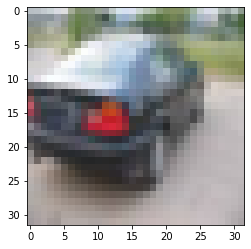

Label: automobile , Predict: automobile


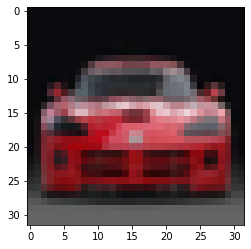

Label: automobile , Predict: automobile


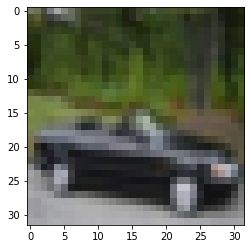

Label: automobile , Predict: automobile


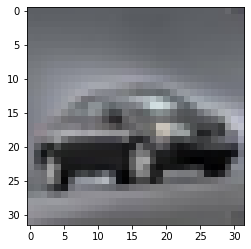

Label: automobile , Predict: automobile


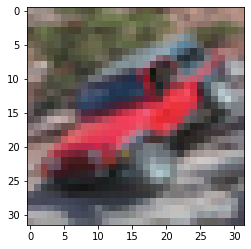

Label: automobile , Predict: automobile


In [128]:
for i in range(6000,6005):
    img, label = val_dl.dataset[i]
    plt.imshow(img.permute(1,2,0))
    plt.show()
    print('Label:',dataset.classes[label], ', Predict:', predict_image(img, model))

'ship'

## Image Classification using ResNet

back to [catalog](#Pytorch-Study)

In [ ]:
import os
import tarfile
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt
import numpy as np

data_dir = 'data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [ ]:
def split_indices(n, val_pct=0.2, seed=99):
    n_val = int(val_pct*n)
    np.random.seed(seed)
    idxs = np.random.permutation(n)
    return idxs[n_val:],idxs[:n_val]

val_pct = 0.2
rand_seed = 42
train_indices, val_indices = split_indices(len(dataset),val_pct, rand_seed)

from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size = 128
train_dl = DataLoader(dataset, batch_size, sampler = SubsetRandomSampler(train_indices))
val_dl = DataLoader(dataset, batch_size, sampler = SubsetRandomSampler(val_indices))

In [ ]:
def get_default_device():
    """Pick GPU if avaliable, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)
    
device = get_default_device()
print(device)

train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(val_dl, device)

### Channel-wise data normalization and Randomized data augmentations

We can create training and validation datasets using the `ImageFolder` class from `torchvision`. In addition to the `ToTensor` transform, we'll also apply some other transforms to the images. There are a few important changes we'll make while creating PyTorch datasets for training and validation:

1. **Use test set for validation**: Instead of setting aside a fraction (e.g. 10%) of the data from the training set for validation, we'll simply use the test set as our validation set. This just gives a little more data to train with. In general, once you have picked the best model architecture & hypeparameters using a fixed validation set, it is a good idea to retrain the same model on the entire dataset just to give it a small final boost in performance.
2. **Channel-wise data normalization**: We will normalize the image tensors by subtracting the mean and dividing by the standard deviation across each channel. As a result, the mean of the data across each channel is 0, and standard deviation is 1. Normalizing the data prevents the values from any one channel from disproportionately affecting the losses and gradients while training, simply by having a higher or wider range of values that others.

<img src="https://i.imgur.com/LYxXBVg.png" width="360">


3. **Randomized data augmentations**: We will apply randomly chosen transformations while loading images from the training dataset. Specifically, we will pad each image by 4 pixels, and then take a random crop of size 32 x 32 pixels, and then flip the image horizontally with a 50% probability. Since the transformation will be applied randomly and dynamically each time a particular image is loaded, the model sees slightly different images in each epoch of training, which allows it generalize better.

![data-augmentation](https://imgaug.readthedocs.io/en/latest/_images/cropandpad_percent.jpg)

In [38]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torch.utils.data import TensorDataset, DataLoader

In [39]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [40]:
import os
# PyTorch datasets
data_dir = 'data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [41]:
batch_size = 256
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size)

In [42]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl,normalized=False):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        if normalized:
            ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        else:
            ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

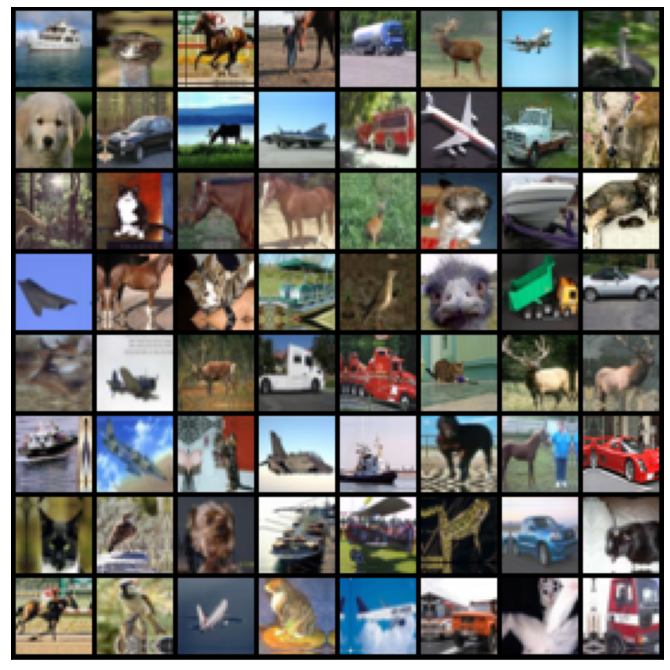

In [48]:
show_batch(train_dl,normalized=False)

In [49]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
    
device = get_default_device()
device

device(type='cuda')

In [50]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

### Modeling with RestNet and Batch Normalization

One of the key changes to our CNN model this time is the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers.

![](https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png)

Here is a very simple Residual block:

In [51]:
class SimpleResBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.relu2(out + x)
        return out
    
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [52]:
model = SimpleResBlock()
model = model.cuda()

In [53]:
for images, labels in train_dl:
    out = model(images)
    print(out.shape)
    break

torch.Size([256, 3, 32, 32])


#### Add Batch Normalization

Normalized the output on each layer --> able to train large and deep model.

Aviod output of layers either too large or too small

This seeming small change produces a drastic improvement in the performance of the model. Also, after each convolutional layer, we'll add a batch normalization layer, which normalizes the outputs of the previous layer. 

Go through the following blog posts to learn more:

* Why and how residual blocks work: https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec
* Batch normalization and dropout explained: https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd

We will use the ResNet9 architecture, as described in [this blog series](https://www.myrtle.ai/2018/09/24/how_to_train_your_resnet/) :

![resnet-9](https://github.com/lambdal/cifar10-fast/raw/master/net.svg?sanitize=true)

In [95]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss':loss.detach(),'val_acc':acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [96]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self,in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64,128,pool=True)
        self.res1 = nn.Sequential(conv_block(128,128), conv_block(128,128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [97]:
model= to_device(ResNet9(3,10), device)

In [98]:
model=model.cuda()

## Training the model

Before we train the model, we're going to make a bunch of small but important improvements to our `fit` function:

* **Learning rate scheduling**: Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we'll use is called the **"One Cycle Learning Rate Policy"**, which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs. Learn more: https://sgugger.github.io/the-1cycle-policy.html

* **Weight decay**: We also use weight decay, which is yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.Learn more: https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab

* **Gradient clipping**: Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called gradient clipping. Learn more: https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48


Let's define a `fit_one_cycle` function to incorporate these changes. We'll also record the learning rate used for each batch.

In [124]:
## weight decade
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
#     torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [125]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 5.054577827453613, 'val_acc': 0.33027344942092896}]

In [126]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
#                              grad_clip=grad_clip, 
#                              weight_decay=0, 
                             opt_func=opt_func)

### Validate



In [122]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
plot_losses(history)

### Predict

In [114]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: airplane , Predicted: bird


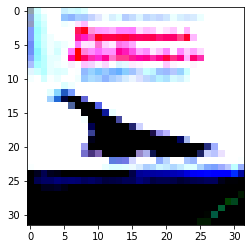

In [118]:
img, label = valid_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

## Generative Adverserial Networks in Pytorch

back to [catalog](#Pytorch-Study)

Deep neural networks are used mainly for supervised learning: classification or regression. Generative Adverserial Networks or GANs, however, use neural networks for a very different purpose: Generative modeling

> Generative modeling is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset. - [Source](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/)

While there are many approaches used for generative modeling, a Generative Adverserial Network takes the following approach: 

![GAN Flowchart](https://i.imgur.com/6NMdO9u.png)

There are two neural networks: a *Generator* and a *Discriminator*. The generator generates a "fake" sample given a random vector/matrix, and the discriminator attempts to detect whether a given sample is "real" (picked from the training data) or "fake" (generated by the generator). Training happens in tandem: we train the discriminator for a few epochs, then train the generator for a few epochs, and repeat. This way both the generator and the discriminator get better at doing their jobs. This rather simple approach can lead to some astounding results. The following images ([source](https://machinelearningmastery.com/resources-for-getting-started-with-generative-adversarial-networks/)), for instances, were all generated using GANs:

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/04/Example-of-Photorealistic-Human-Faces-Generated-by-a-GAN.png" alt="gans_results" width="480">


GANs however, can be notoriously difficult to train, and are extremely sensitive to hyperparameters, activation functions and regularization. In this tutorial, we'll train a GAN to generate images of handwritten digits similar to those from the MNIST database.

<img src="https://i.imgur.com/CAYnuo1.jpg" width="360" >

Most of the code for this tutorial has been borrowed for this excellent repository of PyTorch tutorials: [github.com/yunjey/pytorch-tutorial](https://github.com/yunjey/pytorch-tutorial). Here's what we're going to do:

* Define the problem statement
* Load the data (with transforms and normalization)
    * Denormalize for visual inspection of samples
* Define the Discriminator network
    * Study the activation function: Leaky ReLU
* Define the Generator network
    * Explain the output activation function: TanH
    * Look at some sample outputs
* Define losses, optimizers and helper functions for training
    * For discriminator
    * For generator
* Train the model
    * Save intermediate generated images to file
* Look at some outputs
* Save the models
